# Welcome to the Tweet sentiment finder. In this notebook we track the overall sentiment for major current events.

Import the needed libraries

In [1]:
import re
import numpy as np
import pandas as pd
import nltk
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from nltk.tokenize import RegexpTokenizer
from sklearn import preprocessing

#Sentiment finder
from textblob import TextBlob

In [10]:
DATASET_ENCODING = "ISO-8859-1"
DATASET_COLUMNS=['polarity','ids','date','flag','user','tweet']
df = pd.read_csv('./data/trainingandtestdata/training.1600000.processed.noemoticon.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
# target: the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)
# ids: The id of the tweet ( 2087)
# date: the date of the tweet (Sat May 16 23:58:44 UTC 2009)
# flag: The query (lyx). If there is no query, then this value is NO_QUERY.
# user: the user that tweeted (robotickilldozr)
# text: the text of the tweet (Lyx is cool)

df.head()

,polarity,ids,date,flag,user,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [9]:
df.shape

(1600000, 6)

In [ ]:
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv('cleaned_superbowl_halftime_tweets.csv', encoding=DATASET_ENCODING)

df.tweet = df.tweet.astype(str) 
df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], inplace=True)

df['polarity'] = df.apply(lambda x: TextBlob(x['tweet']).sentiment.polarity, axis=1)

# Change the label to either be 1 for positive or 0 for negative
df.loc[df.polarity >= 0, "polarity"] = 1
df.loc[df.polarity < 0, "polarity"] = 0
df = df.astype({"polarity": int})

df['tweet']=df['tweet'].str.lower()
df.head()


,tweet_dt,id,username,name,tweet,polarity
0,2022-02-13,1495505998001356803,RussBrookes1981,Russ Brookes,many reasons nfl successful compared rugby thi...,1
1,2022-02-13,1495505087493464069,AlannaMcKennaaa,Alanna McKenna,one favorite years commercials however ll take...,1
2,2022-02-13,1495505066584907784,Brunoepalmeida,Bruno Almeida,sã³ agora ã© que vi o halftime show super bowl...,1
3,2022-02-13,1495504859965136903,nevil22,neil thomas,forget pitches nfl artificial imagine setting ...,0
4,2022-02-13,1495504855120633858,pisomojado16,William,best smu basketball halftime show time,1


In [13]:
# Plotting the distribution for dataset.

ax = df.groupby('polarity').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)
# Storing data in lists.
tweet, sentiment = list(df['tweet']), list(df['sentiment'])

,ids,date,flag,user,tweet
polarity,,,,,
0,800000,800000,800000,800000,800000
4,800000,800000,800000,800000,800000


In [11]:
data=df[['tweet','polarity']]
data['tweet']=data['tweet'].str.lower()
data.head()

/var/folders/t0/9dl8f01n5s7c0vftl_ys8lh80000gn/T/ipykernel_20530/3052574731.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tweet']=data['tweet'].str.lower()


,tweet,polarity
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0
1,is upset that he can't update his facebook by ...,0
2,@kenichan i dived many times for the ball. man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


In [ ]:
tokenizer = RegexpTokenizer(r'\w+')
data['tweet'] = data['tweet'].apply(tokenizer.tokenize)
#print(df['tweet'].head())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data

data['tweet']= data['tweet'].apply(lambda x: stemming_on_text(x))
print(data['tweet'].head())

0    [many, reasons, nfl, successful, compared, rug...
1    [one, favorite, years, commercials, however, l...
2    [sã³, agora, ã, que, vi, o, halftime, show, su...
3    [forget, pitches, nfl, artificial, imagine, se...
4        [best, smu, basketball, halftime, show, time]
Name: tweet, dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data

data['tweet'] = data['tweet'].apply(lambda x: lemmatizer_on_text(x))
print(data['tweet'].head())

tweet_list = data['tweet']
data["tweet"] = data["tweet"].astype(str)

0    [many, reasons, nfl, successful, compared, rug...
1    [one, favorite, years, commercials, however, l...
2    [sã³, agora, ã, que, vi, o, halftime, show, su...
3    [forget, pitches, nfl, artificial, imagine, se...
4        [best, smu, basketball, halftime, show, time]
Name: tweet, dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
X=data.tweet
y=data.polarity

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =26105111)
print(X_train.dtype)
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)

vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

object


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


No. of feature_words:  51618


In [ ]:
def model_Evaluate(model):
    #enc = preprocessing.LabelEncoder()
    #y_test_encoded = enc.fit_transform(y_test)
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    #Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

In [ ]:
import scipy

In [ ]:
#Encode the y train data
lab_enc = preprocessing.LabelEncoder()
y_train_encoded = lab_enc.fit_transform(y_train)

              precision    recall  f1-score   support

           0       0.93      0.66      0.77        76
           1       0.94      0.99      0.97       424

    accuracy                           0.94       500
   macro avg       0.93      0.82      0.87       500
weighted avg       0.94      0.94      0.94       500



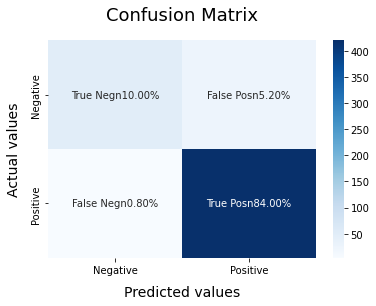

In [ ]:
#SVCMODEL
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

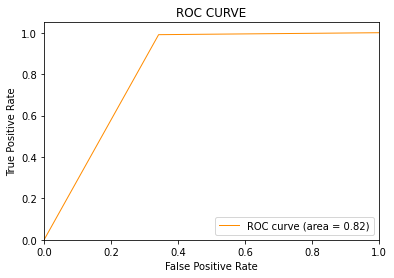

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import pickle
# pickling the vectorizer
pickle.dump(vectoriser, open('vectorizer.sav', 'wb'))
# pickling the model
pickle.dump(SVCmodel, open('SVCclassifier.sav', 'wb'))

              precision    recall  f1-score   support

           0       1.00      0.05      0.10        76
           1       0.85      1.00      0.92       424

    accuracy                           0.86       500
   macro avg       0.93      0.53      0.51       500
weighted avg       0.88      0.86      0.80       500



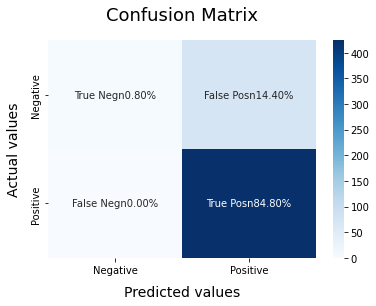

In [ ]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

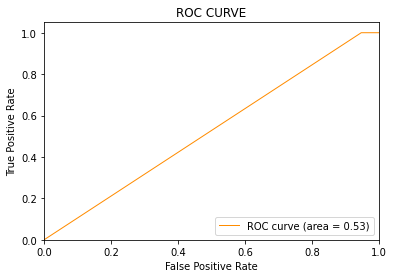

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import pickle
# pickling the model
pickle.dump(BNBmodel, open('BNBclassifier.sav', 'wb'))

              precision    recall  f1-score   support

           0       0.91      0.39      0.55        76
           1       0.90      0.99      0.95       424

    accuracy                           0.90       500
   macro avg       0.91      0.69      0.75       500
weighted avg       0.90      0.90      0.89       500




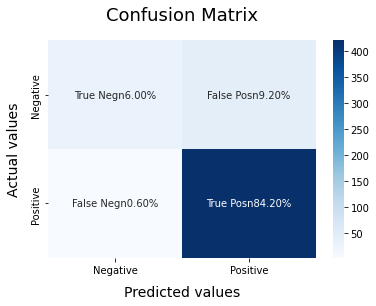

In [ ]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)
print()

In [ ]:
import pickle
# pickling the vectorizer
pickle.dump(vectoriser, open('vectorizer.sav', 'wb'))
# pickling the model
pickle.dump(LRmodel, open('classifier.sav', 'wb'))

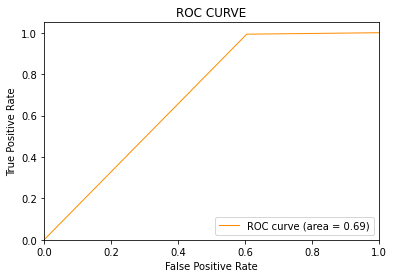

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()